In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

from wordcloud import WordCloud


Load dataset - We will be using Amazon fine foods review dataset to train and test the model

In [154]:
data = pd.read_csv('reviews_dataset.csv')

data = data.head(10000)
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [155]:
data.dropna(inplace=True)
data = data[data['Score'] != 3]

Neutral values

Positivity
1    7616
0    1522
Name: count, dtype: int64


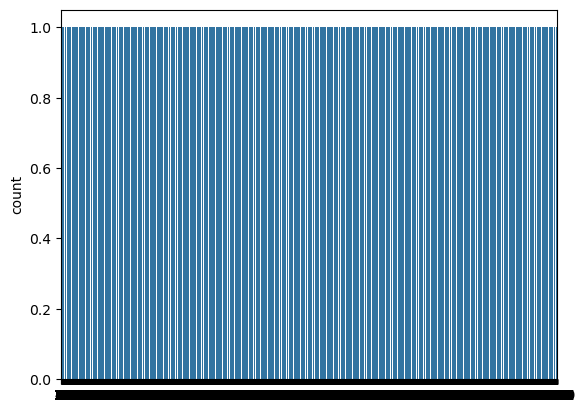

In [156]:
data['Positivity'] = np.where(data['Score'] > 3, 1, 0)
sns.countplot(data['Positivity'])
print(data['Positivity'].value_counts())

plt.show()

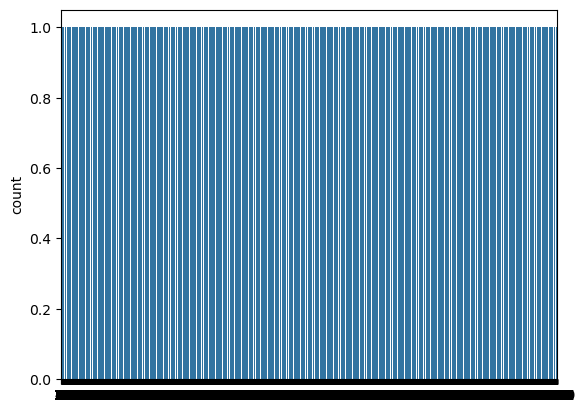

In [158]:
data = data.drop(['ProductId','UserId','ProfileName','Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'], axis=1)
print(data.shape)

KeyError: "['ProductId', 'UserId', 'ProfileName', 'Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary'] not found in axis"

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Positivity'], random_state = 0)

In [160]:
print('X_train shape: ', X_train.shape)
print("X_test shape",X_test.shape)

X_train shape:  (6853,)
X_test shape (2285,)


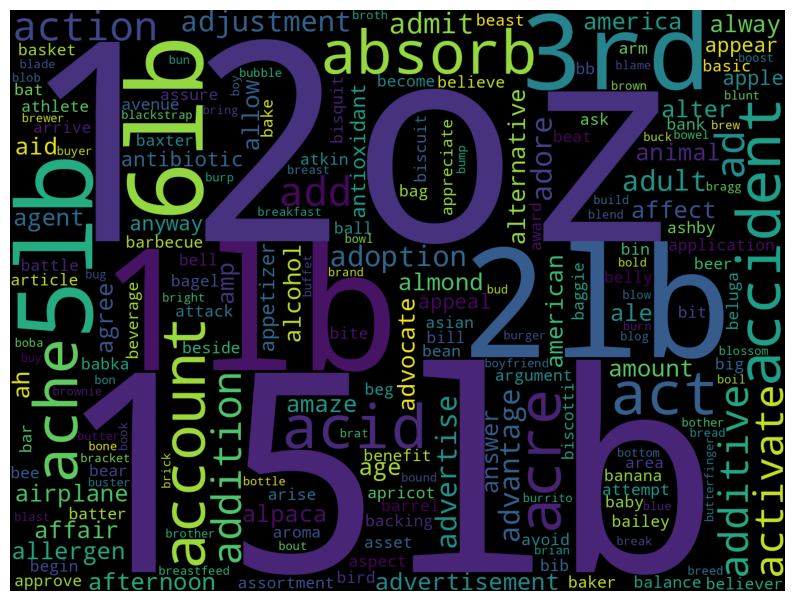

In [161]:
vect = CountVectorizer().fit(X_train)

feat = vect.get_feature_names_out()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()


### Transforming into Bag of words representation

Store in a matrix form

In [162]:
X_train_vectorized = vect.transform(X_train)

### Train the model and calculate accuracy

In [163]:

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print("Accuracy: ",accuracy_score(y_test, predictions))



Accuracy:  0.9168490153172867


/home/kaleb/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  Area Under the Receiver Operating Characteristic Curve (ROC AUC)
assessing the performance of our binary classification model using logistic regression

AUC:  0.8181506318262545


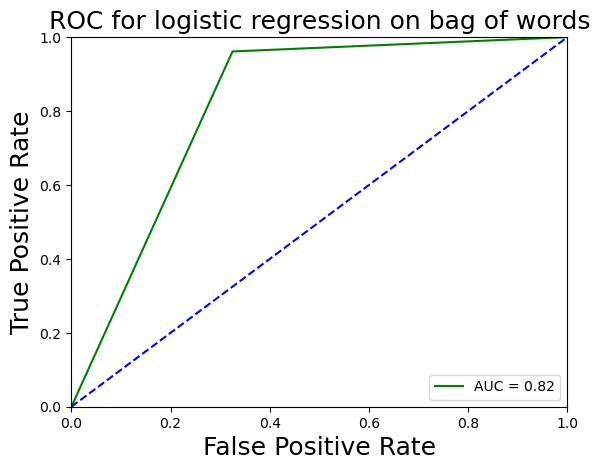

In [164]:

roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.title('ROC for logistic regression on bag of words', fontsize=18)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

In [165]:
# Top 10 positive and negative words

# getting the feature names
feature_names = np.array(vect.get_feature_names_out())

# argsort: Integer indicies that would sort the index if used as an indexer
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['disappointing' 'disappointed' 'yuck' 'worst' 'return' 'awful' 'horrible'
 'weak' 'stick' 'grounds']

Largest Coefs: 
['perfect' 'smooth' 'delicious' 'excellent' 'best' 'pleased' 'great'
 'amazing' 'wonderful' 'refreshing']



### TF IDF (term-frequency-inverse-document-frequency).

In [205]:
# ignore terms that appear in less than 5 documents
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names_out())

4687

### Regenerate word cloud

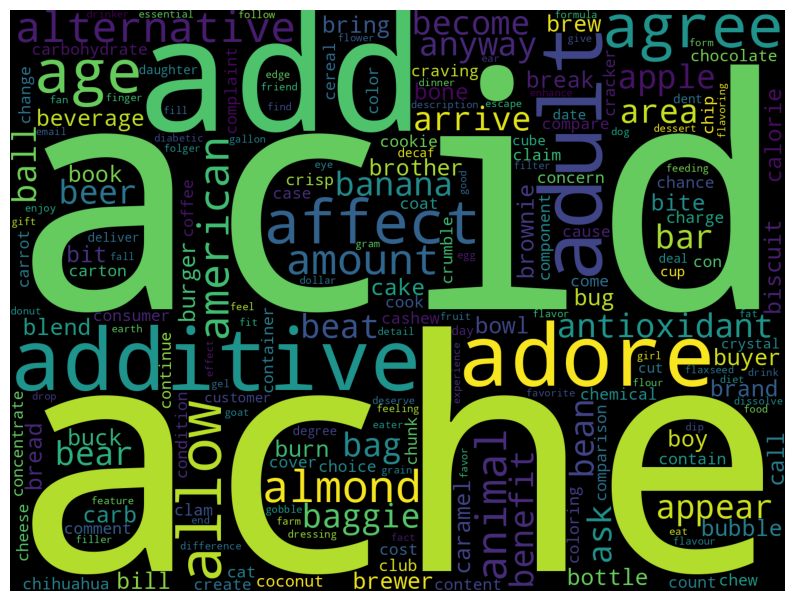

In [167]:
feat = vect.get_feature_names_out()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [206]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print("Accuracy: ",accuracy_score(y_test, predictions))



Accuracy:  0.887527352297593


AUC:  0.6543080924669458


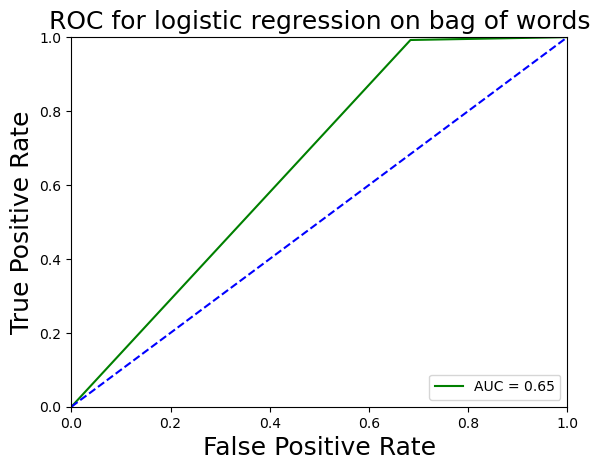

In [207]:
# Redraw the ROC curve
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.title('ROC for logistic regression on bag of words', fontsize=18)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

In [208]:
new_review = ['The food was delicious', 'not bad', 'bad']

print(model.predict(vect.transform(new_review)))

[1 0 0]


##  Using n-grams
Using groups of words instead of single words. This reduces misclassification.

In [174]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names_out())

19041

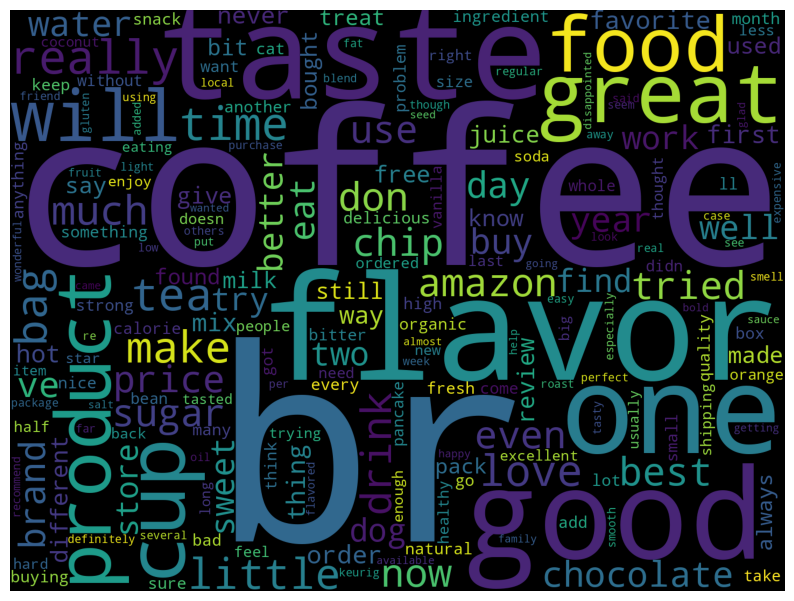

In [175]:
feat = vect.get_feature_names_out()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [176]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print("Accuracy: ",accuracy_score(y_test, predictions))


Accuracy:  0.9242888402625821


AUC:  0.8179385114120782


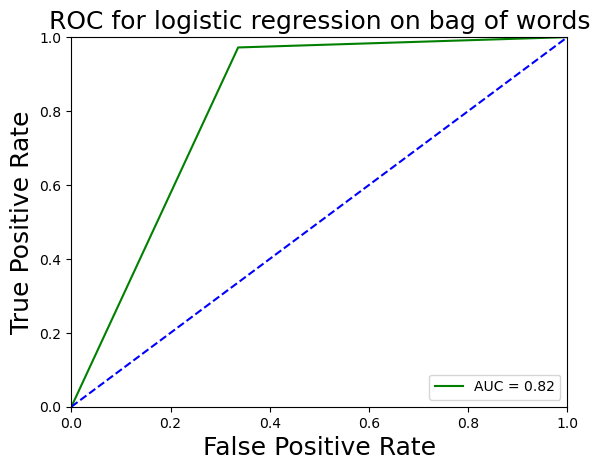

In [177]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.title('ROC for logistic regression on bag of words', fontsize=18)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

In [180]:
new_review = ['The food is not good, I would never buy them again', 'not bad']
print(model.predict(vect.transform(new_review)))

[0 1]


### Using 3-grams

In [276]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names_out())

25800

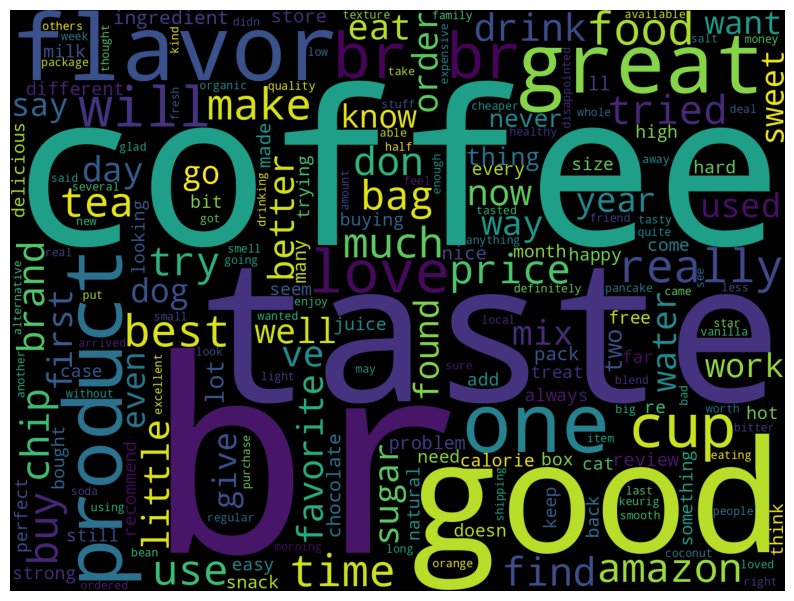

In [277]:
feat = vect.get_feature_names_out()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [278]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print("Accuracy: ",accuracy_score(y_test, predictions))


Accuracy:  0.9269146608315099


AUC:  0.8287200800498555


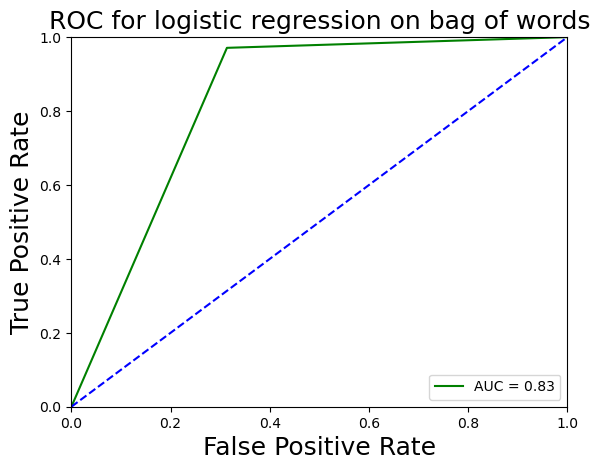

In [279]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.title('ROC for logistic regression on bag of words', fontsize=18)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

In [280]:
new_review = ['very excellent','not good']
print(model.predict(vect.transform(new_review)))

[1 1]


In [281]:
# Top 10 positive and negative words

# getting the feature names
feature_names = np.array(vect.get_feature_names_out())

# argsort: Integer indicies that would sort the index if used as an indexer
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['disappointed' 'disappointing' 'eat it' 'weak' 'stick' 'return' 'worst'
 'even' 'terrible' 'not for']

Largest Coefs: 
['great' 'delicious' 'perfect' 'excellent' 'the best' 'smooth' 'nice'
 'wonderful' 'not too' 'loves']

